<a href="https://colab.research.google.com/github/josyelemalencar-hub/Avanti-Bootcamp/blob/main/Equipe_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregamento do dataset

In [1]:
# Imports

!pip install opendatasets
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 8.9 MB/s eta 0:00:00


In [2]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: josyelealencar@gmail.com
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification


100%|██████████| 920M/920M [00:04<00:00, 213MB/s]


In [3]:
!ls

recyclable-and-household-waste-classification  sample_data


## Criando dataframe

In [4]:
import cv2
import os
import imagehash
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [5]:
root_dir = './recyclable-and-household-waste-classification/images/images'

In [6]:
count_corrupted = 0
corrupted = list()

dataframe_list = list()

for dirpath, dirnames, filenames in os.walk(root_dir):
    # Extract the category folder. Assumes the structure is root_dir/category/sub_category/image.jpg
    # The 'folder' in the original code was the immediate child of root_dir (e.g., 'plastic_shopping_bags')
    relative_path = os.path.relpath(dirpath, root_dir)
    path_parts = relative_path.split(os.sep)

    category_folder = None
    if len(path_parts) > 0 and path_parts[0] != '.': # path_parts[0] could be '.' if dirpath is root_dir itself
        category_folder = path_parts[0]

    # Only process files if a category folder could be determined (i.e., not the root_dir itself)
    if category_folder is None:
        continue

    for image_name in filenames:
        img_dir = os.path.join(dirpath, image_name)

        # Check if the file has an extension
        if '.' in image_name:
            name_parts = image_name.rsplit('.', 1)
            if len(name_parts) == 2:
                image_format = name_parts[1].lower()
            else:
                continue # Skip files without a proper extension
        else:
            continue # Skip files without an extension

        img = cv2.imread(img_dir)

        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_pil = Image.fromarray(img_rgb)
            img_hash = imagehash.phash(img_pil)
            width, height, channels = img.shape
            img_corrupted = False
        else:
            count_corrupted += 1
            corrupted.append(img_dir)
            img_corrupted = True
            img_hash, width, height, channels = None, None, None, None

        dataframe_list.append([img_dir, img_corrupted, img_hash, image_format, width, height, channels, category_folder])

In [7]:
dataframe_list

[['./recyclable-and-household-waste-classification/images/images/styrofoam_food_containers/default/Image_209.png',
  False,
  array([[ True, False,  True,  True,  True,  True, False, False],
         [ True, False, False,  True,  True,  True,  True,  True],
         [ True,  True, False, False, False, False,  True, False],
         [False, False,  True,  True,  True,  True,  True, False],
         [ True,  True, False, False, False, False, False, False],
         [ True,  True, False, False, False, False, False,  True],
         [ True,  True, False, False,  True, False,  True,  True],
         [False,  True,  True, False, False, False, False,  True]]),
  'png',
  256,
  256,
  3,
  'styrofoam_food_containers'],
 ['./recyclable-and-household-waste-classification/images/images/styrofoam_food_containers/default/Image_247.png',
  False,
  array([[ True, False, False, False, False, False, False, False],
         [False,  True, False,  True, False, False, False,  True],
         [ True,  Tr

In [8]:
print(f'Total de Imagens Corrompidas: {count_corrupted}\nImagens corrompidas {corrupted}')

Total de Imagens Corrompidas: 0
Imagens corrompidas []


In [9]:
df = pd.DataFrame(columns=['image_path', 'corrupted', 'image_hash', 'image_format', 'width', 'height', 'channels', 'label'], data = dataframe_list)

In [10]:
df.head()

,image_path,corrupted,image_hash,image_format,width,height,channels,label
0,./recyclable-and-household-waste-classificatio...,False,bc9fc23ec0c1cb61,png,256,256,3,styrofoam_food_containers
1,./recyclable-and-household-waste-classificatio...,False,8051ffa6f9af03c0,png,256,256,3,styrofoam_food_containers
2,./recyclable-and-household-waste-classificatio...,False,eeca912b95b54e12,png,256,256,3,styrofoam_food_containers
3,./recyclable-and-household-waste-classificatio...,False,eb4b91b5c86e8495,png,256,256,3,styrofoam_food_containers
4,./recyclable-and-household-waste-classificatio...,False,95257e7cc1c5741c,png,256,256,3,styrofoam_food_containers


In [11]:
valid_ext = (".jpg", ".jpeg", ".png")

non_images = []

for root, dirs, files in os.walk(root_dir):
    for f in files:
        if not f.lower().endswith(valid_ext):
            non_images.append(os.path.join(root, f))

print("Arquivos que não são imagens:")
print(non_images)

Arquivos que não são imagens:
[]


In [12]:
from collections import Counter

formats = []

for root, dirs, files in os.walk(root_dir):
    for file in files:
        path = os.path.join(root, file)

        try:
            with Image.open(path) as img:
                formats.append(img.format)
        except:
            pass  # ignora arquivos que não são imagens

# Contagem dos formatos
format_counts = Counter(formats)

print("Formatos encontrados no dataset:")
print(format_counts)

Formatos encontrados no dataset:
Counter({'PNG': 15000})


In [13]:
print(f'Total de Imagens: {len(df)}')
print(f'Shape do DataFrame: {df.shape[0]} linhas, {df.shape[1]} colunas')

Total de Imagens: 15000
Shape do DataFrame: 15000 linhas, 8 colunas


* O dataset "Recyclable and Household Waste Classification" possui um total de 1500 imagens (todas em PNG) e 8 colunas, e nenhuma imagem corrompida.

In [14]:
df.describe().loc[['mean', 'std', 'min', 'max']]

,width,height,channels
mean,256.0,256.0,3.0
std,0.0,0.0,0.0
min,256.0,256.0,3.0
max,256.0,256.0,3.0


In [15]:
# Contar as ocorrências de cada classe na coluna 'label' do DataFrame df
df_classes = df['label'].value_counts().reset_index()

# Renomear as colunas para 'classe' e 'quantidade'
df_classes.columns = ["classe", "quantidade"]

df_classes

,classe,quantidade
0,styrofoam_food_containers,500
1,coffee_grounds,500
2,plastic_soda_bottles,500
3,glass_food_jars,500
4,office_paper,500
5,plastic_trash_bags,500
6,plastic_cup_lids,500
7,aerosol_cans,500
8,newspaper,500
9,glass_cosmetic_containers,500


In [21]:
total = len(df)

df_classes["porcentagem"] = (df_classes["quantidade"] / total) * 100

df_classes

,classe,quantidade,porcentagem
0,styrofoam_food_containers,500,3.333333
1,coffee_grounds,500,3.333333
2,plastic_soda_bottles,500,3.333333
3,glass_food_jars,500,3.333333
4,office_paper,500,3.333333
5,plastic_trash_bags,500,3.333333
6,plastic_cup_lids,500,3.333333
7,aerosol_cans,500,3.333333
8,newspaper,500,3.333333
9,glass_cosmetic_containers,500,3.333333


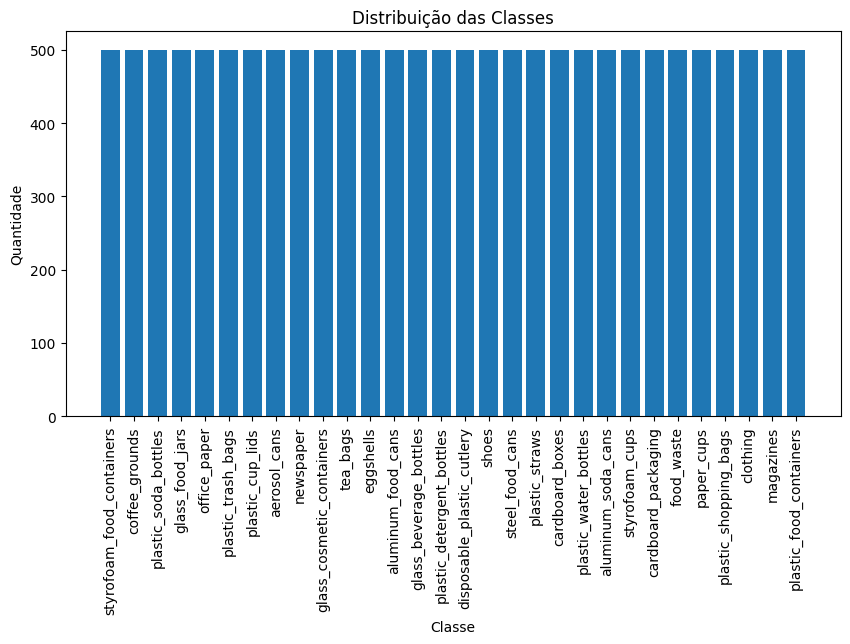

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df_classes["classe"], df_classes["quantidade"])
plt.xticks(rotation=90)
plt.title("Distribuição das Classes")
plt.ylabel("Quantidade")
plt.xlabel("Classe")
plt.show()

A distribuição das classes está equilibrada, pois todas apresentam a mesma quantidade de exemplos.

# Duplicatas

In [16]:
#Quantidade de imagens duplicatas

df['image_hash'].duplicated().sum()

np.int64(5149)

In [17]:
df_duplicated = df[df['image_hash'].duplicated()]
df_duplicated

,image_path,corrupted,image_hash,image_format,width,height,channels,label
18,./recyclable-and-household-waste-classificatio...,False,943cebc19c3ce195,png,256,256,3,styrofoam_food_containers
27,./recyclable-and-household-waste-classificatio...,False,eeca912b95b54e12,png,256,256,3,styrofoam_food_containers
29,./recyclable-and-household-waste-classificatio...,False,bc6bc3903d8f9264,png,256,256,3,styrofoam_food_containers
32,./recyclable-and-household-waste-classificatio...,False,c696b969b412c8b7,png,256,256,3,styrofoam_food_containers
35,./recyclable-and-household-waste-classificatio...,False,943cebc19c3ce195,png,256,256,3,styrofoam_food_containers
...,...,...,...,...,...,...,...,...
14993,./recyclable-and-household-waste-classificatio...,False,d5083e5781d8c72f,png,256,256,3,plastic_food_containers
14995,./recyclable-and-household-waste-classificatio...,False,94c1ea6abeb4b168,png,256,256,3,plastic_food_containers
14996,./recyclable-and-household-waste-classificatio...,False,aecac58791676169,png,256,256,3,plastic_food_containers
14998,./recyclable-and-household-waste-classificatio...,False,ee48a11bd43dc2e5,png,256,256,3,plastic_food_containers


In [18]:
# 1. Converta a coluna de hashes para string primeiro
df['image_hash'] = df['image_hash'].astype(str)

# 2. Agora o groupby funcionará perfeitamente
groups = df.groupby('image_hash')['image_path'].apply(list)

# 3. Filtre apenas o que for duplicado (lista com mais de 1 elemento)
duplicated_images_fast = groups[groups.str.len() > 1].to_dict()

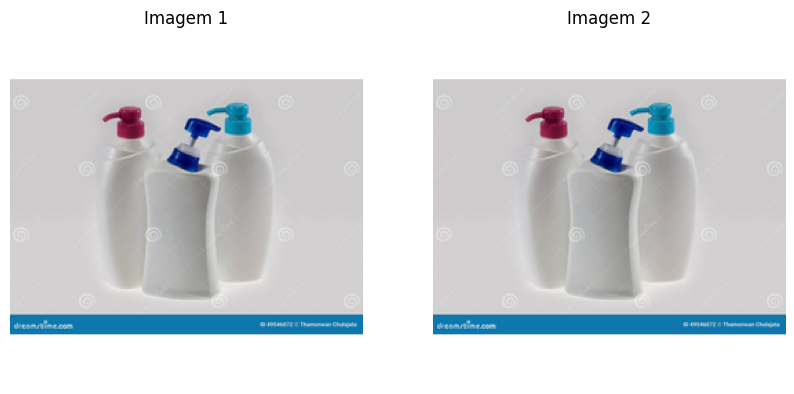

In [19]:
image1 = cv2.imread('./recyclable-and-household-waste-classification/images/images/plastic_detergent_bottles/real_world/Image_171.png')
image2 = cv2.imread('./recyclable-and-household-waste-classification/images/images/plastic_detergent_bottles/default/Image_115.png')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Converter de BGR (formato OpenCV) para RGB (formato Matplotlib)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Mostrar a primeira imagem
axes[0].imshow(image1_rgb)
axes[0].axis('off')  # Remove os eixos
axes[0].set_title('Imagem 1')

# Mostrar a segunda imagem
axes[1].imshow(image2_rgb)
axes[1].axis('off')  # Remove os eixos
axes[1].set_title('Imagem 2')

# Exibir as imagens
plt.show()

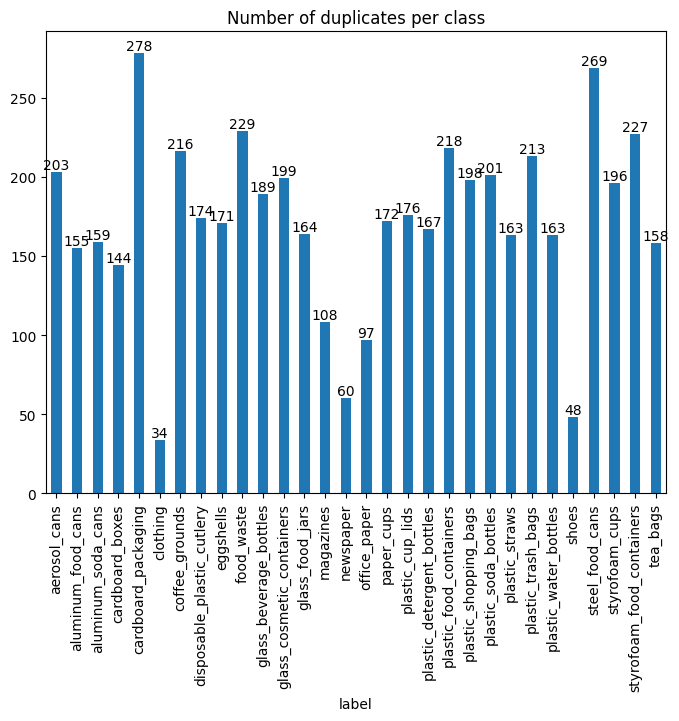

In [20]:
# Agrupando duplicatas por classe (coluna 'label') e contando
duplicates_by_class = df_duplicated.groupby('label').size()

# Gerando o gráfico de barras
ax = duplicates_by_class.plot(kind='bar', title='Number of duplicates per class', figsize=(8, 6))

# Adicionando os valores exatos em cima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Ajustando a rotação dos rótulos no eixo X
plt.xticks(rotation=90)

# Exibindo o gráfico
plt.show()